## KoNLPy 설치 및 테스트

In [ ]:
print('hi')

hi


In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only availabl

E: Package 'python-dev' has no installation candidate


In [ ]:
import konlpy

In [ ]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
# okt 사용해보기 from konlpy

from konlpy.tag import Okt
okt=Okt()
# 형태소
print("okt.morphs : ", okt.morphs('안녕하세요. 저는 딥러닝 입니다.'))
# 명사
print("okt.nouns : ", okt.nouns('안녕하세요. 저는 딥러닝 입니다.'))
# 형태소 + 품사
print("okt.pos : ", okt.pos('안녕하세요. 저는 딥러닝 입니다.'))

okt.morphs :  ['안녕하세요', '.', '저', '는', '딥', '러닝', '입니다', '.']
okt.nouns :  ['저', '딥', '러닝']
okt.pos :  [('안녕하세요', 'Adjective'), ('.', 'Punctuation'), ('저', 'Noun'), ('는', 'Josa'), ('딥', 'Noun'), ('러닝', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]


## 원 데이터 가지고 진행해보기

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')
# %matplotlib inline

path = 'C://Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown System.. Sry')

import time

nowtime = time.localtime()
nowtime_mm = time.strftime('%m', nowtime) # Month
nowtime_dd = time.strftime('%d', nowtime) # Day

Unknown System.. Sry


In [ ]:
f_path = os.getcwd() # 현재 작업 경로 기준
directory_name = f'FigureOut_{nowtime_mm}{nowtime_dd}'
save_f_path = f_path + '/' + directory_name + '/'

try:
    os.mkdir(directory_name)
except:
    pass

In [ ]:
# Excel 파일 경로
excel_file_path = 'pre_231224.xlsx'

In [ ]:
from collections import Counter
from konlpy.tag import Okt
okt=Okt()

In [ ]:
# 형태소 분리
main_df = pd.read_excel(excel_file_path, header = 2)
main_df['devide_msg'] = main_df['msg'].apply(lambda x: okt.nouns(x))
main_df

,writer,wrote_at,msg,group_num,msg_label,writer.1,devide_msg
0,PA(어린이팬),10:56:00,"군집별 CTR 데이터를 보고 있습니다. 특정 군집이 CTR이 가장 높은데, 해당 군...",1.0,q,PA(어린이팬),"[군집, 별, 데이터, 보고, 특정, 군집, 이, 가장, 해당, 군집, 이벤트, 수..."
1,어린이,16:01:00,저라면 이벤트 수는 적지만 다른 군집보다 CTR이 유의미하게 차이가 있는지 먼저 검...,1.0,a,어린이,"[라면, 이벤트, 수, 적지, 다른, 군집, 이, 유의, 미하, 차이, 먼저, 검증..."
2,Roy,16:08:00,각 군집별 모수가 어떻게 됐나요? CTR 높았던 군집의 모수는 어느정도인지도 궁금합니다,1.0,a,Roy,"[각, 군집, 별, 모수, 군집, 모수, 정도, 인지도]"
3,어린이,16:09:00,몇천단위 정도 되려나요? ㅎㅎ 아무래도 반응율도 그렇고요. 사실 광고면 이 타겟 확...,1.0,a,어린이,"[단위, 정도, 요, 반응, 율도, 사실, 광고, 이, 타겟, 확대, 해도]"
4,PA(어린이팬),16:15:00,답변 감사합니다! 이렇게 이해했는데 맞을까요? 1. 전체 집단 vs (CTR이 높았...,1.0,c,PA(어린이팬),"[답변, 이해, 전체, 집단, 이, 군집, 간의, 유의, 검정, 유의, 시, 노출,..."
...,...,...,...,...,...,...,...
2566,라이언,16:51:00,저만 이상하다 느끼는 게 아니네요ㅠ 휴...여쭤보길 잘 했어요 감사드려요,495.0,c,라이언,"[게, 감사]"
2567,지지플랏,17:05:00,다단계인가?!,495.0,a,지지플랏,[다단계]
2568,Tube,17:06:00,dogfooding 을 하길 원하나보네요,495.0,a,Tube,[하나]
2569,인생이우당탕,17:44:00,"가지마세요 ,,",495.0,a,인생이우당탕,[가지]


In [ ]:
# 말뭉치 생성
corpus = "".join(main_df['msg'].tolist())
corpus

'군집별 CTR 데이터를 보고 있습니다. 특정 군집이 CTR이 가장 높은데, 해당 군집의 이벤트 수(노출)은 다른 군집에 비해 작은 편이에요. \'이 군집의 이벤트 수(노출)을 높히도록 유도하면 전체 CTR이 높이진다\'라고 판단하기 위해서는 어떤 근거를 들어야할까요? 느낌 상, 집단의 수와 신뢰구간 등을 확인해봐야할 것 같은데, 명확히 어떤 방법을 통해 확인해야할지 감이 안와서 질문드립니다!저라면 이벤트 수는 적지만 다른 군집보다 CTR이 유의미하게 차이가 있는지 먼저 검증하고, 해당 군집과 유사한 군집들은 이런이런 애들이 있으니 노출해서 CTR 증대가 가능할 것 같다고 정리할 것 같네요 제가 이해한게 맞나요?? 대다수 근데 원래 숫자이 작으면 컨버전 과정에서 비율 바이어스가 엄청껴요 실무적으로 진행해보시면 아시겠지만요.. 이-> 가 업무하면서쳐서 오타많네요 이해해주세요 노출한다는게 특히 광고쪽이면 더더욱. 집단의 규모 자체가 작을 수도 있으니 유념해서 보셔야합니다각 군집별 모수가 어떻게 됐나요? CTR 높았던 군집의 모수는 어느정도인지도 궁금합니다몇천단위 정도 되려나요? ㅎㅎ 아무래도 반응율도 그렇고요. 사실 광고면 이 타겟 확대해보시죠 해도 .. 이미 잡히는만큼 다 잡았을수도있어요 ㅎㅎ..답변 감사합니다! 이렇게 이해했는데 맞을까요? 1. 전체 집단 vs (CTR이 높았던) 군집 간의 유의성 검정 2. 유의성 ok 시, 노출을 늘리면 증대 가능 액션 제시 전체 모수는 30만 정도이고, CTR이 높았던 군집은 4천정도 되어요!네네~~ 저라면 그렇게 해볼 것 같네요 그리고 마케터쪽에 내가 이 군집 확대 액션 방향으로 고민중인데 어케 생각하시는지 노출을 늘리는 방법에 대해 논의해보시거나(채널을 늘릴지 횟수를 늘릴지 당장 소요예산을 조정할지 등) 하면 좋겟어요 회원제 회사면 꼭 광고 액션이 아니라 내부 DB 액션으로 나올수도있고요 회원 중 이런 세그는 할만한것 같다 등역시 액션 제시의 마무리는 실무진과의 논의군요ㅎㅎ 좋은 조언 감사드려요!!네네 :) 그냥 주절주

In [ ]:
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [ ]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'군집별  데이터를 보고 있습니다 특정 군집이 이 가장 높은데 해당 군집의 이벤트 수노출은 다른 군집에 비해 작은 편이에요 이 군집의 이벤트 수노출을 높히도록 유도하면 전체 이 높이진다라고 판단하기 위해서는 어떤 근거를 들어야할까요 느낌 상 집단의 수와 신뢰구간 등을 확인해봐야할 것 같은데 명확히 어떤 방법을 통해 확인해야할지 감이 안와서 질문드립니다저라면 이벤트 수는 적지만 다른 군집보다 이 유의미하게 차이가 있는지 먼저 검증하고 해당 군집과 유사한 군집들은 이런이런 애들이 있으니 노출해서  증대가 가능할 것 같다고 정리할 것 같네요 제가 이해한게 맞나요 대다수 근데 원래 숫자이 작으면 컨버전 과정에서 비율 바이어스가 엄청껴요 실무적으로 진행해보시면 아시겠지만요 이 가 업무하면서쳐서 오타많네요 이해해주세요 노출한다는게 특히 광고쪽이면 더더욱 집단의 규모 자체가 작을 수도 있으니 유념해서 보셔야합니다각 군집별 모수가 어떻게 됐나요  높았던 군집의 모수는 어느정도인지도 궁금합니다몇천단위 정도 되려나요 ㅎㅎ 아무래도 반응율도 그렇고요 사실 광고면 이 타겟 확대해보시죠 해도  이미 잡히는만큼 다 잡았을수도있어요 ㅎㅎ답변 감사합니다 이렇게 이해했는데 맞을까요  전체 집단  이 높았던 군집 간의 유의성 검정  유의성  시 노출을 늘리면 증대 가능 액션 제시 전체 모수는 만 정도이고 이 높았던 군집은 천정도 되어요네네 저라면 그렇게 해볼 것 같네요 그리고 마케터쪽에 내가 이 군집 확대 액션 방향으로 고민중인데 어케 생각하시는지 노출을 늘리는 방법에 대해 논의해보시거나채널을 늘릴지 횟수를 늘릴지 당장 소요예산을 조정할지 등 하면 좋겟어요 회원제 회사면 꼭 광고 액션이 아니라 내부  액션으로 나올수도있고요 회원 중 이런 세그는 할만한것 같다 등역시 액션 제시의 마무리는 실무진과의 논의군요ㅎㅎ 좋은 조언 감사드려요네네  그냥 주절주절 말씀드렸는데 도움이 되셨다니 다행이네요 잘 정리하시길 저는 프로젝트 목적자체에 궁금한 부분이 있는데요 왜 을 높이는 것이 목표가 되었는지 궁금합

In [ ]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['군집', '별', '데이터', '보고', '특정', '군집', '이', '가장', '해당', '군집', '이벤트', '노출', '다른', '군집', '편이', '이', '군집', '이벤트', '노출', '유도', '전체', '이', '판단', '위', '근거', '요', '느낌', '상', '집단', '수', '신뢰구간', '등', '확인', '것', '방법', '통해', '확인', '감', '질문', '라면', '이벤트', '수', '적지', '다른', '군집', '이', '유의', '미하', '차이', '먼저', '검증', '해당', '군집', '군집', '애', '증대', '것', '정리', '것', '제', '이해', '게', '대다수', '원래', '숫자', '컨버전', '과정', '비율', '바이어스', '실무', '진행', '요', '이', '업무', '오타', '이해', '광고', '쪽', '더', '더욱', '집단', '규모', '자체', '작', '수도', '유념', '야합', '다각', '군집', '별', '모수', '군집', '모수', '정도', '인지도', '단위', '정도', '요', '반응', '율도', '사실', '광고', '이', '타겟', '확대', '해도', '답변', '이해', '전체', '집단', '이', '군집', '간의', '유의', '검정', '유의', '시', '노출', '증대', '가능', '액션', '제시', '전체', '모수', '만', '정도', '이', '군집', '천정', '네네', '라면', '것', '마케터쪽', '내', '이', '군집', '확대', '액션', '방향', '고민', '어케', '생각', '노출', '방법', '대해', '논의', '채널', '횟수', '당장', '예산', '조정', '등', '회원', '제', '회사', '꼭', '광고', '액션', '내부', '액션', '회원', '중', '그', '것', '등', '역시', '액션', '제시', '마무리', '실무', '진과',

In [ ]:
# 빈도 탐색
counter = Counter(nouns)
counter.most_common(10)

[('데이터', 967),
 ('것', 644),
 ('분석', 597),
 ('수', 385),
 ('저', 289),
 ('혹시', 246),
 ('요', 232),
 ('때', 225),
 ('회사', 213),
 ('분', 199)]

In [ ]:
# 한글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('데이터', 967),
 ('분석', 597),
 ('혹시', 246),
 ('회사', 213),
 ('생각', 192),
 ('업무', 162),
 ('사용', 158),
 ('이벤트', 134),
 ('질문', 132),
 ('관련', 131)]

In [ ]:
# 불용어 사전
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))


bow_vect = vect.fit_transform(main_df['msg'].tolist())
#word_list = vect.get_feature_names()
word_list = vect.get_feature_names_out()

# 각 단어가 전체 대화 중에 등장한 총 횟수
count_list = bow_vect.toarray().sum(axis=0)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
word_list

array(['가가', '가게', '가격', ..., '흥미진진', '희망', '힘들엇습니'], dtype=object)

In [ ]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 16,
 '가게': 1,
 '가격': 5,
 '가공': 16,
 '가기': 3,
 '가까이': 4,
 '가끔': 9,
 '가나': 3,
 '가늠': 1,
 '가능': 3,
 '가능성': 7,
 '가닥': 1,
 '가도': 5,
 '가독성': 1,
 '가든': 1,
 '가량': 1,
 '가령': 1,
 '가로': 20,
 '가림': 1,
 '가면': 5,
 '가보': 1,
 '가분': 2,
 '가상': 3,
 '가설': 23,
 '가설검정': 1,
 '가성': 3,
 '가세': 3,
 '가속': 1,
 '가스': 1,
 '가슴': 1,
 '가시': 3,
 '가신': 2,
 '가야': 2,
 '가요': 46,
 '가용': 8,
 '가을': 1,
 '가의': 8,
 '가이드': 21,
 '가이드라인': 2,
 '가인': 1,
 '가입': 13,
 '가입자': 2,
 '가장': 24,
 '가정': 11,
 '가중': 2,
 '가지': 50,
 '가치': 7,
 '가치관': 1,
 '가해': 1,
 '각각': 15,
 '각기': 1,
 '각색': 1,
 '각오': 1,
 '각자': 3,
 '간과': 1,
 '간극': 1,
 '간다': 4,
 '간단': 1,
 '간의': 4,
 '간이': 1,
 '간전': 1,
 '간접': 1,
 '간혹': 2,
 '갈수록': 1,
 '감당': 1,
 '감동': 1,
 '감사': 35,
 '감소': 1,
 '감안': 6,
 '감자': 2,
 '감히': 1,
 '갑자기': 6,
 '강남역': 1,
 '강사': 3,
 '강슬기': 4,
 '강연': 27,
 '강의': 44,
 '강의실': 2,
 '강점': 7,
 '강제': 6,
 '강조': 1,
 '강하': 1,
 '강화': 1,
 '개강': 1,
 '개개인': 1,
 '개괄': 1,
 '개념': 24,
 '개디멘젼': 1,
 '개론': 1,
 '개발': 62,
 '개발자': 22,
 '개별': 5,
 '개선': 30,
 '개설': 11,
 '개수': 5,
 '개시': 1,
 

In [ ]:
# TF-IDF 변환

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)

(2571, 3355)


In [ ]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 3300)	0.19789037718020436
  (0, 3219)	0.11126479749287743
  (0, 3065)	0.14927206256232983
  (0, 3028)	0.13856061598182745
  (0, 3000)	0.12138205417369678
  (0, 2973)	0.12423453921035736
  (0, 2683)	0.1470999306126458
  (0, 2680)	0.0952538855958092
  (0, 2438)	0.1346441252732991
  (0, 2169)	0.20319639265587194
  (0, 2087)	0.1767107663838534
  (0, 1675)	0.18595137129732628
  (0, 1158)	0.1030502883962999
  (0, 1082)	0.09749000486658968
  (0, 643)	0.059091577539294116
  (0, 529)	0.09702488390870086
  (0, 517)	0.13028995046449351
  (0, 496)	0.2902338590137084
  (0, 366)	0.17015445285882666
  (0, 324)	0.7354996530632291
  (0, 42)	0.12932001106835458


In [ ]:
vect.vocabulary_

{'군집': 324,
 '데이터': 643,
 '보고': 1158,
 '특정': 3000,
 '가장': 42,
 '해당': 3219,
 '이벤트': 2169,
 '노출': 496,
 '다른': 529,
 '편이': 3065,
 '유도': 2087,
 '전체': 2438,
 '판단': 3028,
 '근거': 366,
 '느낌': 517,
 '집단': 2683,
 '신뢰구간': 1675,
 '확인': 3300,
 '방법': 1082,
 '통해': 2973,
 '질문': 2680,
 '라면': 743,
 '적지': 2409,
 '유의': 2099,
 '미하': 1037,
 '차이': 2703,
 '먼저': 915,
 '검증': 145,
 '증대': 2623,
 '정리': 2482,
 '이해': 2203,
 '대다수': 586,
 '원래': 2047,
 '숫자': 1569,
 '컨버전': 2863,
 '과정': 260,
 '비율': 1279,
 '바이어스': 1048,
 '실무': 1690,
 '진행': 2677,
 '업무': 1848,
 '오타': 1962,
 '광고': 274,
 '더욱': 629,
 '규모': 335,
 '자체': 2336,
 '수도': 1538,
 '유념': 2085,
 '모수': 966,
 '정도': 2478,
 '인지도': 2240,
 '단위': 554,
 '반응': 1061,
 '율도': 2115,
 '사실': 1338,
 '타겟': 2919,
 '확대': 3296,
 '해도': 3220,
 '답변': 573,
 '간의': 58,
 '검정': 144,
 '가능': 9,
 '액션': 1782,
 '제시': 2522,
 '천정': 2733,
 '네네': 471,
 '마케터쪽': 864,
 '방향': 1093,
 '고민': 213,
 '어케': 1824,
 '생각': 1412,
 '대해': 619,
 '논의': 503,
 '채널': 2719,
 '횟수': 3332,
 '당장': 579,
 '예산': 1932,
 '조정': 2553,
 '회원':

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{324: '군집', 643: '데이터', 1158: '보고', 3000: '특정', 42: '가장', 3219: '해당', 2169: '이벤트', 496: '노출', 529: '...


In [ ]:
main_df.head()

,writer,wrote_at,msg,group_num,msg_label,writer.1,devide_msg
0,PA(어린이팬),10:56:00,"군집별 CTR 데이터를 보고 있습니다. 특정 군집이 CTR이 가장 높은데, 해당 군...",1.0,q,PA(어린이팬),"[군집, 별, 데이터, 보고, 특정, 군집, 이, 가장, 해당, 군집, 이벤트, 수..."
1,어린이,16:01:00,저라면 이벤트 수는 적지만 다른 군집보다 CTR이 유의미하게 차이가 있는지 먼저 검...,1.0,a,어린이,"[라면, 이벤트, 수, 적지, 다른, 군집, 이, 유의, 미하, 차이, 먼저, 검증..."
2,Roy,16:08:00,각 군집별 모수가 어떻게 됐나요? CTR 높았던 군집의 모수는 어느정도인지도 궁금합니다,1.0,a,Roy,"[각, 군집, 별, 모수, 군집, 모수, 정도, 인지도]"
3,어린이,16:09:00,몇천단위 정도 되려나요? ㅎㅎ 아무래도 반응율도 그렇고요. 사실 광고면 이 타겟 확...,1.0,a,어린이,"[단위, 정도, 요, 반응, 율도, 사실, 광고, 이, 타겟, 확대, 해도]"
4,PA(어린이팬),16:15:00,답변 감사합니다! 이렇게 이해했는데 맞을까요? 1. 전체 집단 vs (CTR이 높았...,1.0,c,PA(어린이팬),"[답변, 이해, 전체, 집단, 이, 군집, 간의, 유의, 검정, 유의, 시, 노출,..."


In [ ]:
def rating_to_label(qna):
    if qna == 'q':
        return 1
    else:
        return 0

main_df['qna_cnt'] = main_df['msg_label'].apply(lambda x: rating_to_label(x))

In [ ]:
main_df.head()

,writer,wrote_at,msg,group_num,msg_label,writer.1,devide_msg,qna_cnt
0,PA(어린이팬),10:56:00,"군집별 CTR 데이터를 보고 있습니다. 특정 군집이 CTR이 가장 높은데, 해당 군...",1.0,q,PA(어린이팬),"[군집, 별, 데이터, 보고, 특정, 군집, 이, 가장, 해당, 군집, 이벤트, 수...",1
1,어린이,16:01:00,저라면 이벤트 수는 적지만 다른 군집보다 CTR이 유의미하게 차이가 있는지 먼저 검...,1.0,a,어린이,"[라면, 이벤트, 수, 적지, 다른, 군집, 이, 유의, 미하, 차이, 먼저, 검증...",0
2,Roy,16:08:00,각 군집별 모수가 어떻게 됐나요? CTR 높았던 군집의 모수는 어느정도인지도 궁금합니다,1.0,a,Roy,"[각, 군집, 별, 모수, 군집, 모수, 정도, 인지도]",0
3,어린이,16:09:00,몇천단위 정도 되려나요? ㅎㅎ 아무래도 반응율도 그렇고요. 사실 광고면 이 타겟 확...,1.0,a,어린이,"[단위, 정도, 요, 반응, 율도, 사실, 광고, 이, 타겟, 확대, 해도]",0
4,PA(어린이팬),16:15:00,답변 감사합니다! 이렇게 이해했는데 맞을까요? 1. 전체 집단 vs (CTR이 높았...,1.0,c,PA(어린이팬),"[답변, 이해, 전체, 집단, 이, 군집, 간의, 유의, 검정, 유의, 시, 노출,...",0


In [ ]:
main_df["qna_cnt"].value_counts()

0    2164
1     407
Name: qna_cnt, dtype: int64

In [ ]:
# Train, Test 나누기
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = main_df['qna_cnt']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [ ]:
x_train.shape, y_train.shape

((2056, 3355), (2056,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [ ]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.86
precision: 1.00
recall: 0.11
F1: 0.20


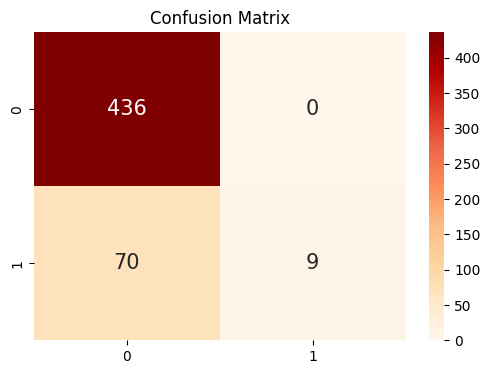

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize = (6, 4))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.savefig(save_f_path + 'Confusion Matrix(LR)_origin.png')

### 샘플링 재조정

In [ ]:
question_random_idx = main_df[main_df['qna_cnt']==1].sample(275, random_state=12).index.tolist()
nonquestion_random_idx = main_df[main_df['qna_cnt']==0].sample(275, random_state=12).index.tolist()

In [ ]:
random_idx = question_random_idx + nonquestion_random_idx
x = tf_idf_vect[random_idx]
y = main_df['qna_cnt'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
x_train.shape, y_train.shape

((440, 3355), (440,))

In [ ]:
x_test.shape, y_test.shape

((110, 3355), (110,))

In [ ]:
# 모델 재학습
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [ ]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
lr_accurary = round(accuracy_score(y_test, y_pred), 2)

print('precision: %.2f' % precision_score(y_test, y_pred))
lr_precision = round(precision_score(y_test, y_pred), 2)

print('recall: %.2f' % recall_score(y_test, y_pred))
lr_recall = round(recall_score(y_test, y_pred), 2)

print('F1: %.2f' % f1_score(y_test, y_pred))
lr_f1 = round(f1_score(y_test, y_pred), 2)

accuracy: 0.84
precision: 0.84
recall: 0.80
F1: 0.82


In [ ]:
lr_accurary = round(accuracy_score(y_test, y_pred), 2)
lr_precision = round(precision_score(y_test, y_pred), 2)
lr_recall = round(recall_score(y_test, y_pred), 2)
lr_f1 = round(f1_score(y_test, y_pred), 2)

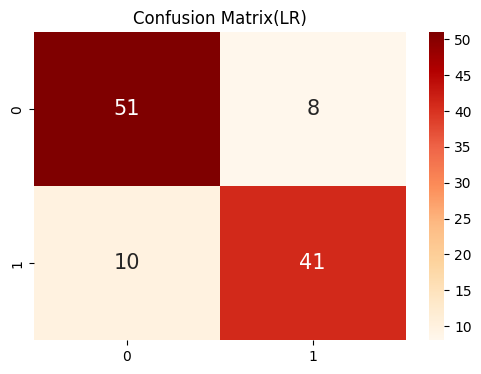

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix(LR)')
plt.savefig(save_f_path + 'Confusion Matrix(LR).png')

In [ ]:
# Question / NonQuestion 키워드 추출
lr2.coef_

array([[0.08156659, 0.        , 0.        , ..., 0.        , 0.08649321,
        0.        ]])

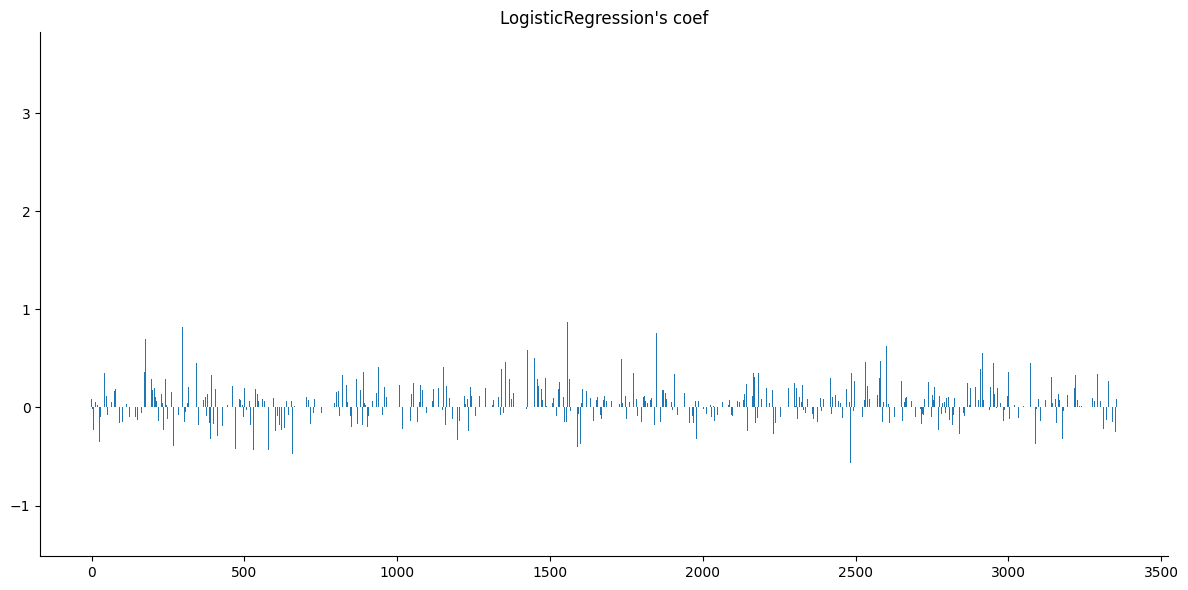

In [ ]:
# print logistic regression's coef

plt.figure(figsize=(12, 6))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])
plt.title("LogisticRegression's coef")
sns.despine()
plt.tight_layout()
plt.savefig(save_f_path + "LogisticRegression's coef.png")

In [ ]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(3.580476374668756, 3280), (1.6009903762790445, 2680), (1.4639272389366156, 264), (1.134394661341066, 184), (1.1023226229582899, 1167)]
[(-0.627029693509496, 1214), (-0.6566963253429469, 885), (-0.6989098458916249, 3198), (-0.9162173768039833, 1748), (-1.2743161354900239, 573)]


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(3.580476374668756, 3280),
 (1.6009903762790445, 2680),
 (1.4639272389366156, 264),
 (1.134394661341066, 184),
 (1.1023226229582899, 1167),
 (1.0307742538659916, 1082),
 (0.9669702143891123, 643),
 (0.892864972715186, 3161),
 (0.8834642886872529, 1238),
 (0.869688140534368, 1557),
 (0.8562816141870633, 1677),
 (0.8468256776460736, 3218),
 (0.8161244812775751, 297),
 (0.7989685832960789, 3300),
 (0.7576632605699466, 1848),
 (0.7454699799213546, 33),
 (0.7201685679134158, 1343),
 (0.6955196901554933, 176),
 (0.6931792164007218, 2478),
 (0.6633208117754842, 3163),
 (0.6265335797773909, 2601),
 (0.6217931468895519, 2677),
 (0.6084653601054951, 2312),
 (0.607804642413724, 2962),
 (0.5910855729276228, 1294),
 (0.5853228903081117, 2225),
 (0.5852002410049368, 1426),
 (0.5707921005361998, 617),
 (0.5632655761564642, 535),
 (0.5557333634461216, 2915),
 (0.5520565216286768, 3089),
 (0.537419003639493, 2886),
 (0.5320221181163423, 2168),
 (0.5275821966255272, 3021),
 (0.5067086672876537, 1268),


In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

In [ ]:
# 질문 키워드 Top Keyword
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

혹시 3.580476374668756
질문 1.6009903762790445
관련 1.4639272389366156
경험 1.134394661341066
보신 1.1023226229582899
방법 1.0307742538659916
데이터 0.9669702143891123
하나 0.892864972715186
분석 0.8834642886872529
수집 0.869688140534368
신분 0.8562816141870633
해결 0.8468256776460736
구매 0.8161244812775751
확인 0.7989685832960789
업무 0.7576632605699466
가요 0.7454699799213546
사용자 0.7201685679134158
경우 0.6955196901554933
정도 0.6931792164007218
하나요 0.6633208117754842


In [ ]:
# 질문 아닌 키워드 Top Keyword
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

답변 -1.2743161354900239
아하 -0.9162173768039833
한번 -0.6989098458916249
말씀 -0.6566963253429469
부서 -0.627029693509496
감사 -0.6186245144217044
입사 -0.5858977862869876
생각 -0.5755582101941595
정말 -0.5640300245183766
발생 -0.5584680270016987
나중 -0.4974498114685263
도메인 -0.4736783597860471
보시 -0.4595440788194462
액션 -0.4587961748470687
합격 -0.45318433918171697
때문 -0.4512665717490886
인지 -0.4508407197331382
이직 -0.4501492882786481
다만 -0.4357251958164099
당장 -0.4322619548486085


In [ ]:
# 모델 2 : SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
svm = SVC(kernel='linear', C=1.0)
svm.fit(x_train, y_train)

# predict in test set
y_pred = svm.predict(x_test)

# 정확도 평가

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
svm_accurary = round(accuracy_score(y_test, y_pred), 2)

print('precision: %.2f' % precision_score(y_test, y_pred))
svm_precision = round(precision_score(y_test, y_pred), 2)

print('recall: %.2f' % recall_score(y_test, y_pred))
svm_recall = round(recall_score(y_test, y_pred), 2)

print('F1: %.2f' % f1_score(y_test, y_pred))
svm_f1 = round(f1_score(y_test, y_pred), 2)

accuracy: 0.79
precision: 0.78
recall: 0.76
F1: 0.77


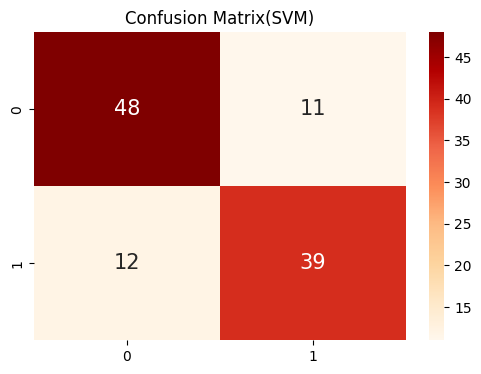

In [ ]:
svm_confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(svm_confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix(SVM)')
plt.savefig(save_f_path + 'Confusion Matrix(SVM).png')

In [ ]:
# 모델 3 : RF
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)  # 100개의 트리를 사용한 Random Forest
rf_model.fit(x_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_model.predict(x_test)

In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
rf_accurary = round(accuracy_score(y_test, y_pred), 2)

print('precision: %.2f' % precision_score(y_test, y_pred))
rf_precision = round(precision_score(y_test, y_pred), 2)

print('recall: %.2f' % recall_score(y_test, y_pred))
rf_recall = round(recall_score(y_test, y_pred), 2)

print('F1: %.2f' % f1_score(y_test, y_pred))
rf_f1 = round(f1_score(y_test, y_pred), 2)

accuracy: 0.85
precision: 0.87
recall: 0.78
F1: 0.82


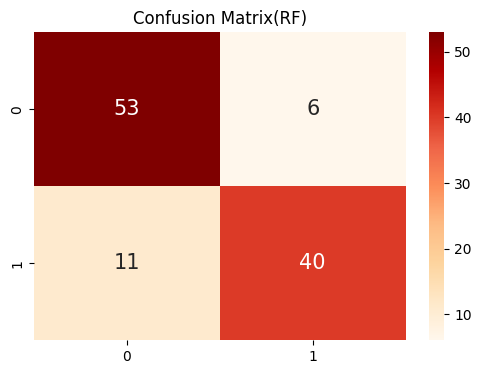

In [ ]:
rf_confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(rf_confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix(RF)')
plt.savefig(save_f_path + 'Confusion Matrix(RF).png')

In [ ]:
result_ml = pd.DataFrame({'Performance' : ['accuracy', 'precision', 'recall', 'f1_score'],
                          'LogisticRegression' : [lr_accurary, lr_precision, lr_recall, lr_f1],
                          'SupportVectorMachine' : [svm_accurary, svm_precision, svm_recall, svm_f1],
                          'RandomForest' : [rf_accurary, rf_precision, rf_recall, rf_f1],
                          })
result_ml

,Performance,LogisticRegression,SupportVectorMachine,RandomForest
0,accuracy,0.84,0.79,0.85
1,precision,0.84,0.78,0.87
2,recall,0.80,0.76,0.78
3,f1_score,0.82,0.77,0.82


In [ ]:
# 데이터프레임을 'Performance' 열을 기준으로 'melt'하여 long format으로 변환
result_melted = pd.melt(result_ml, id_vars='Performance', var_name='Model', value_name='Score')
result_melted

,Performance,Model,Score
0,accuracy,LogisticRegression,0.84
1,precision,LogisticRegression,0.84
2,recall,LogisticRegression,0.80
3,f1_score,LogisticRegression,0.82
4,accuracy,SupportVectorMachine,0.79
5,precision,SupportVectorMachine,0.78
6,recall,SupportVectorMachine,0.76
7,f1_score,SupportVectorMachine,0.77
8,accuracy,RandomForest,0.85
9,precision,RandomForest,0.87


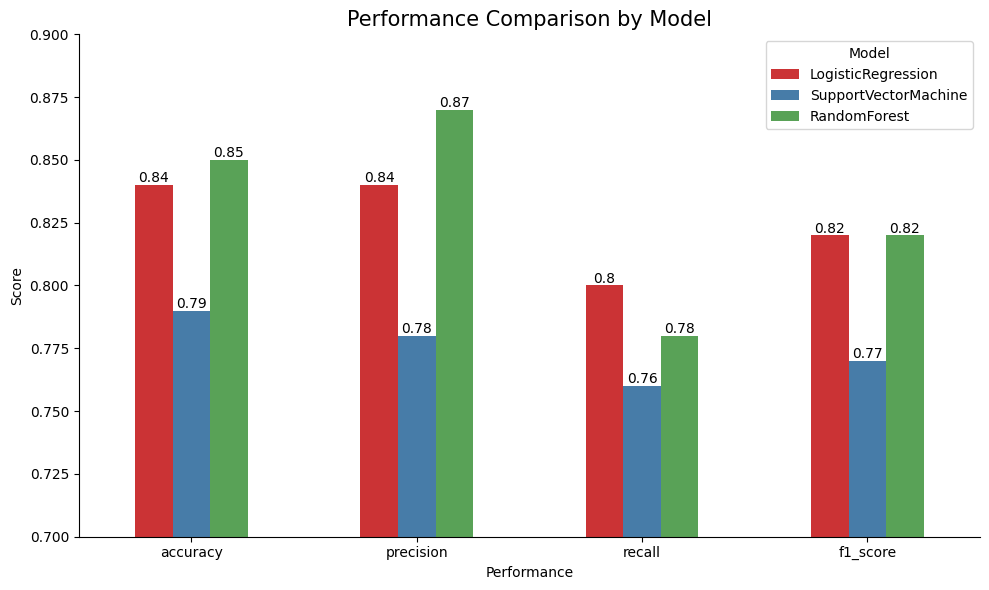

In [ ]:
# seaborn의 barplot을 이용하여 그래프 그리기
plt.figure(figsize=(10, 6))
gg = sns.barplot(x='Performance', y='Score', hue='Model', data=result_melted, palette='Set1', width = 0.5)

# 수치 표시
for p in gg.patches:
            height = p.get_height()
            gg.text(p.get_x() + p.get_width() / 2., height + 0.001, float(height), ha = 'center', size = 10)

plt.title('Performance Comparison by Model', fontsize = 15)
plt.ylabel('Score')
plt.ylim([0.7, 0.9])
sns.despine()
plt.tight_layout()
plt.savefig(save_f_path + 'Performance Comparison by Model.png')